<a href="https://colab.research.google.com/github/pukung375/CE888/blob/master/Lab2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
def boostrap_mean(sample, sample_size, n_iterations):

  boostrap_sample = np.random.choice(sample, size=(n_iterations,sample_size), replace=True)
  mean_array = np.mean(boostrap_sample, axis=1)
  data_mean = np.mean(mean_array)
  lower, upper = np.percentile(mean_array,[5, 95])
  return data_mean, lower, upper

(0.0, 100000.0)

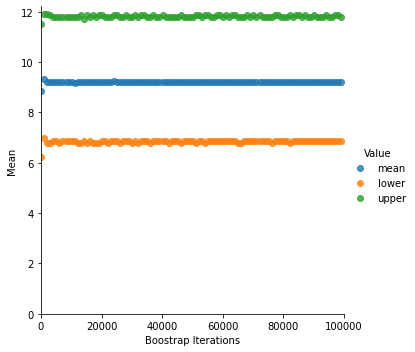

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
    boostrap_sample = np.random.choice(sample, size=(iterations,sample_size), replace=True)
    mean_array = np.mean(boostrap_sample, axis=1)
    data_mean = np.mean(mean_array)
    lower, upper = np.percentile(mean_array, [100-ci, ci])

    return data_mean, lower, upper

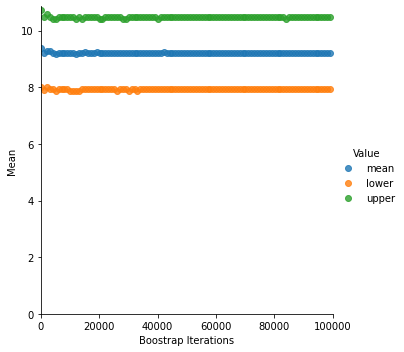

In [6]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np


In [8]:
# Load and visualise the vehicles dataset
# Load the data
    df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
    data = df.values.T[1]
    print(data)
# Note: you can add more cells as needed to organise your code and your plots

[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [0]:
def boostrap_mean(sample, sample_size, n_iterations):

  boostrap_sample = np.random.choice(sample, size=(n_iterations,sample_size), replace=True)
  mean_array = np.mean(boostrap_sample, axis=1)
  data_mean = np.mean(mean_array)
  lower, upper = np.percentile(mean_array,[5, 95])
  return data_mean, lower, upper

(0.0, 100000.0)

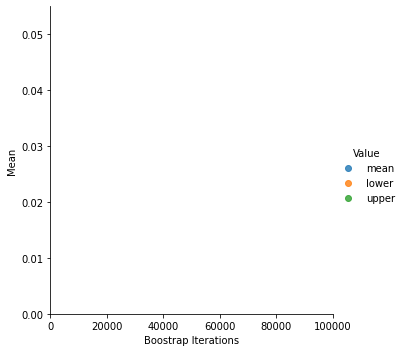

In [10]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

In [12]:
df.columns

Index(['Current fleet', 'New Fleet'], dtype='object')

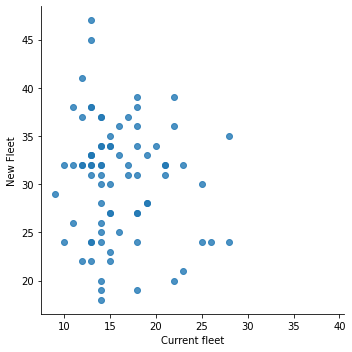

In [13]:
data=df[df.columns[1]].values
sns.lmplot(df.columns[0],df.columns[1],data=df,fit_reg=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f439b886f28>,
      dtype=object)

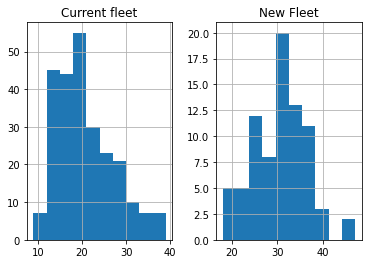

In [16]:
df.hist()

In [0]:
df[['Current fleet']].mean(axis=0)
df[['New Fleet']].mean(axis=0)
current=df[df.columns[0]]
new=df[df.columns[1]][:79]

In [19]:
m,l,u=boostrap_mean(current, len(current), 1000)
print(m)
print(l)

20.132502008032127
19.413253012048195


In [20]:
a,b,c=boostrap_mean(new, len(new), 1000)
print(a)
print(b)
diff_obs=a-m
print(diff_obs)
ctr=0

30.508810126582276
29.379746835443036
10.37630811855015


In [21]:

for i in range(10000):
  concat=np.concatenate((current,new))
  permut=np.random.permutation(concat)
  pold = permut[:249]
  pnew = permut[249:]
  #print(pold,pnew)
  #print('')
  pold1,b,c=boostrap_mean(pold, len(pold), 1)
  pnew1,d,e=boostrap_mean(pnew, len(pnew), 1)
  #print(pold1,pnew1)
  #print(pnew1,pold1)
  diff_perm=pnew1-pold1
  #print(diff_perm)
  if(diff_perm>diff_obs):
    ctr=ctr+1

print(ctr/10000)

0.0
